In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler  
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics

In [2]:
data = pd.read_csv(os.getcwd() + '\data\merged_train.csv')
# data['Party'].describe()
data.head()

,State,County,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Democratic,Republican,Party
0,AZ,apache,4001,72346,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076,16298,7810,1
1,AZ,cochise,4003,128177,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067,17383,26929,0
2,AZ,coconino,4005,138064,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066,34240,19249,1
3,AZ,gila,4007,53179,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000,7643,12180,0
4,AZ,graham,4009,37529,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399,3368,6870,0


In [121]:
# columns = np.array([i for i in range(4, 16)], dtype=np.intp) # All columns
columns = np.array([4, 5, 6, 7, 10, 11, 12, 14, 15], dtype=np.intp) # All columns
# columns = np.array([3, 4, 5, 7, 10, 14, 15], dtype=np.intp) # All columns
# columns = np.array([3, 4, 5, 6, 7, 11, 14, 15], dtype=np.intp) # All columns
print('Columns being used for building the classifier: {}'.format( data.iloc[:, columns].columns ))
X = data.iloc[:, columns]
y = data['Party']

Columns being used for building the classifier: Index(['Percent White, not Hispanic or Latino',
       'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino',
       'Percent Foreign Born', 'Percent Age 65 and Older',
       'Median Household Income', 'Percent Unemployed',
       'Percent Less than Bachelor's Degree', 'Percent Rural'],
      dtype='object')


In [122]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [123]:
def evaluate(X, y_test, y_pred):
    ret_str = ''
    ret_str += 'Adjusted Rand Index: {}'.format( metrics.adjusted_rand_score(y_test, y_pred) ) + '\n'
    ret_str += 'Silhouette Coefficient: {}'.format( metrics.silhouette_score(X, y_pred, metric = "euclidean") )
    return ret_str

In [124]:
def k_means(X, y_test):
    clustering = KMeans(n_clusters = 2, n_init = 1, init = 'random', max_iter=15, random_state = 0).fit(X)
    clusters = clustering.labels_
    cont_matrix = metrics.cluster.contingency_matrix(y_test, clusters)
    sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Contingency matrix')
    plt.tight_layout()
    print(evaluate(X, y_test, clusters))

Adjusted Rand Index: 0.2018760740947231
Silhouette Coefficient: 0.32902568918396896


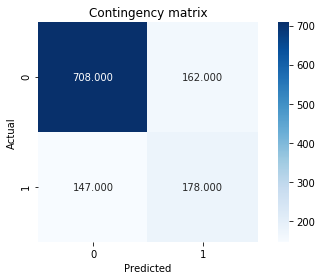

In [125]:
k_means(X, y)

In [126]:
def dbscan(X, y_test):
    clustering = DBSCAN(eps = 3, min_samples = 3, metric = "euclidean").fit(X)
    clusters = clustering.labels_
    cont_matrix = metrics.cluster.contingency_matrix(y_test, clusters)
    sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Contingency matrix')
    plt.tight_layout()
    print(evaluate(X, y_test, clusters))

Adjusted Rand Index: 0.0017465403807912195
Silhouette Coefficient: 0.4561454123787544


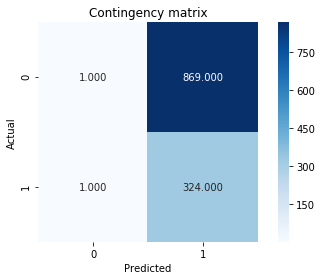

In [127]:
dbscan(X, y)

In [128]:
def hierarchical(X, y_test, method='single', metric='euclidean'):
    clustering = linkage(X, method = method, metric = metric)
    clusters = fcluster(clustering, 2, criterion = 'maxclust')
    cont_matrix = metrics.cluster.contingency_matrix(y_test, clusters)
    sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Contingency matrix')
    plt.tight_layout()
    print(evaluate(X, y_test, clusters))

Adjusted Rand Index: 0.0028041107323011935
Silhouette Coefficient: 0.5372266371793065


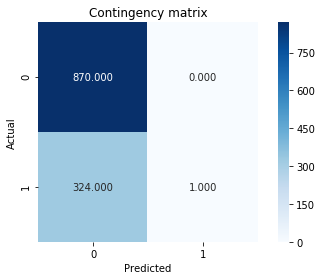

In [129]:
hierarchical(X, y)

Adjusted Rand Index: 0.14115176454132702
Silhouette Coefficient: 0.2676639623805163


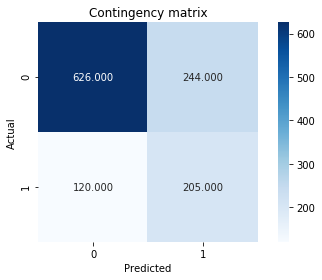

In [130]:
hierarchical(X, y, method='ward')